Problem Statement:

This Dataset of Flipkart Customer Reviews and the associated Ratings (ranging from 1.0 to 5.0) are used to train Natural Language Processing(NLP) algorithms like SENTIMENT ANALYSIS and train Machine Learning Models like GaussianNB, MultinomialNB, BernoulliNB, XGBClassifier to automatically classify the sentiment of customer reviews.

Natural Language Processing tasks like Cleaning the Data, where removing White Space/ Punctuation/ Symbol/ Numbers using StopWords, Lemmatisation methods are performed.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')
import re
import string

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.metrics import precision_score, recall_score, roc_auc_score,confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [2]:
# Reading the data

df = pd.read_csv("./Flipkart_Product_Reviews_with_Setiment_Dataset.csv")
df.head(2)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,awesome,best budget 2 fit cooler nice cooling,positive


In [3]:
df.shape

(205052, 6)

In [4]:
# Checking for null values

df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [5]:
# Dropping null values from the dataset

df.dropna(inplace=True)

In [6]:
df.rename(columns= {'Rate': 'Rating'}, inplace=True)

In [7]:
df = df[['Review', 'Rating']]
df.head()

,Review,Rating
0,super!,5
1,awesome,5
2,fair,3
3,useless product,1
4,fair,3


In [8]:
df.shape

(180379, 2)

In [9]:
# Checking for dtypes

df.dtypes

Review    object
Rating    object
dtype: object

In [10]:
df.value_counts('Rating')

Rating
5                                                                    105641
4                                                                     36966
1                                                                     18294
3                                                                     14024
2                                                                      5451
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
dtype: int64

In [11]:
# Removing unwanted values from the 'Rate' column

rate_del = ['Bajaj DX 2 L/W Dry Iron', 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)', 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)']
# drop rows from above list
df = df[df.Rating.isin(rate_del) == False]

In [12]:
# Converting data type of 'Rating' column from object to float

df['Rating'] = df['Rating'].astype('float')

In [13]:
df.value_counts('Rating').sort_index(ascending = True)

Rating
1.0     18294
2.0      5451
3.0     14024
4.0     36966
5.0    105641
dtype: int64

In [14]:
df.dtypes

Review     object
Rating    float64
dtype: object

In [15]:
df.describe()

,Rating
count,180376.000000
mean,4.143218
std,1.294833
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


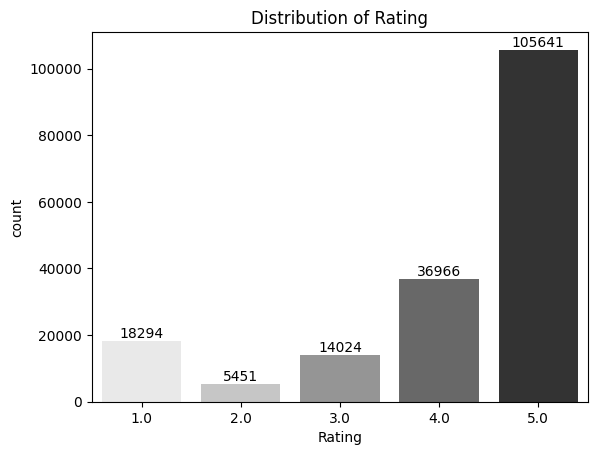

In [16]:
ax = sns.countplot(data=df, x=df['Rating'], palette = 'Greys')
plt.title("Distribution of Rating")

for label in ax.containers:
    ax.bar_label(label)
plt.show()

##### Most of the reviews are among 4.0 and 5.0 ratings, which is almost 80% of all ratings.

In [17]:
# mapping the ratings to 'POSITIVE' and 'NEGATIVE'

sentiment_score = {
    1.0:0,
    2.0:0,
    3.0:0,
    4.0:1,
    5.0:1
}

sentiment = {
    0: 'NEGATIVE',
    1: 'POSITIVE'
}

df['Sentiment_score'] = df['Rating'].map(sentiment_score)
df['Sentiment'] = df['Sentiment_score'].map(sentiment)

df.head()

,Review,Rating,Sentiment_score,Sentiment
0,super!,5.0,1,POSITIVE
1,awesome,5.0,1,POSITIVE
2,fair,3.0,0,NEGATIVE
3,useless product,1.0,0,NEGATIVE
4,fair,3.0,0,NEGATIVE


In [18]:
df['Sentiment_score'].value_counts()

1    142607
0     37769
Name: Sentiment_score, dtype: int64

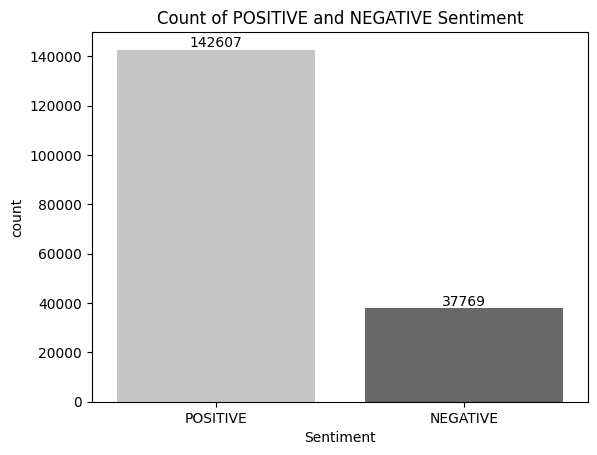

In [19]:
ax = sns.countplot(x = df['Sentiment'], palette = 'Greys')

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Count of POSITIVE and NEGATIVE Sentiment")
plt.show()

##### There is a very high imbalance in the data.

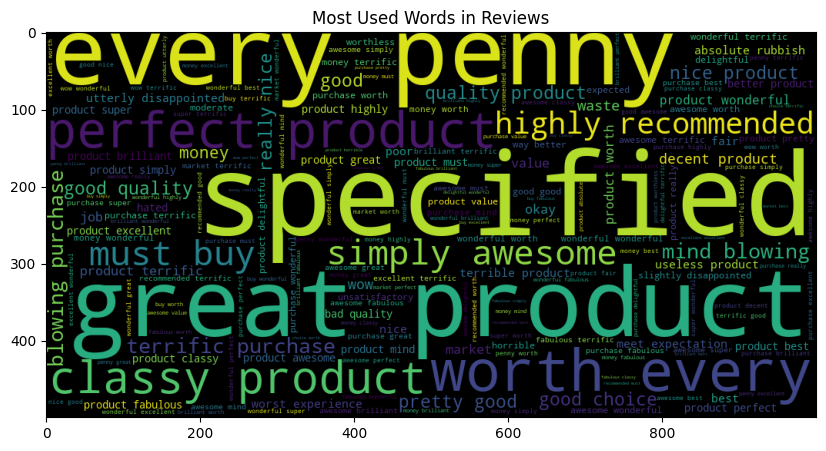

In [20]:
# WordCloud for Most Used Words in Reviews

all_words = pd.Series(' '.join(df['Review']).split())

wordcloud = WordCloud(width=1000, height=500).generate(' '.join(all_words))

plt.figure(figsize=(10,5))
plt.title("Most Used Words in Reviews")
plt.imshow(wordcloud)

##### words like awesome, perfect, classy, great, worth, terrific, highly recommended, must buy, good, choice, mindblowing are very frequently used words in the Reviews.
##### So, overall the customers are inclined positively towards the product.

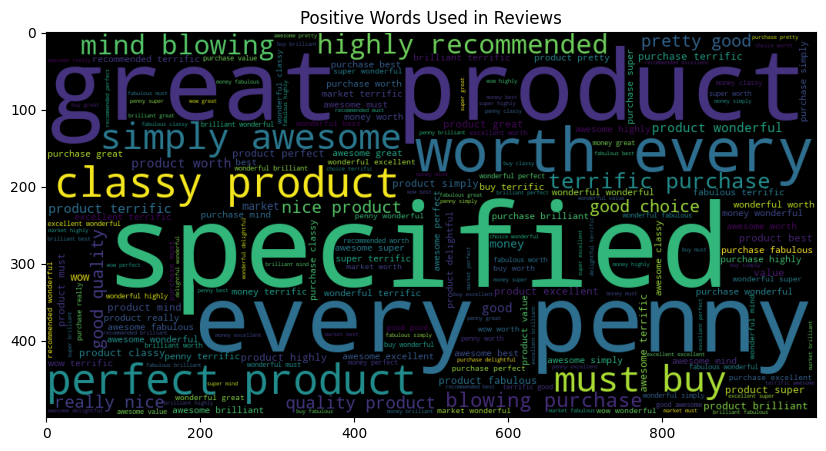

In [21]:
# WordCloud for Most Used Positive Words in Reviews

Pos_words = pd.Series(' '.join(df[df['Sentiment']=='POSITIVE']['Review']).split())

pos_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(Pos_words))

plt.figure(figsize=(10,5))
plt.title("Positive Words Used in Reviews")
plt.imshow(pos_wordcloud)
plt.show()

##### Words like perfect, nice, great, mind blowing, highly recommended, classy, awesome, good quality are frequently used in the Positive Reviews.

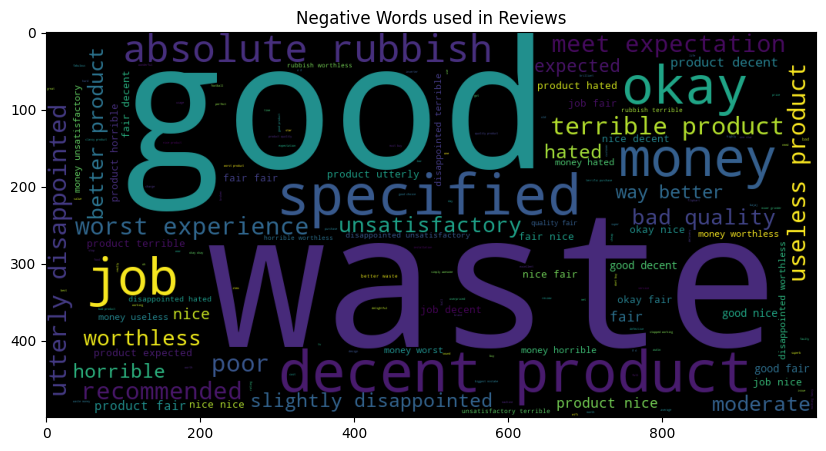

In [22]:
# WordCloud for Most Used Negative Words in Reviews

Neg_words = pd.Series(' '.join(df[df['Sentiment']=='NEGATIVE']['Review']).split())

neg_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(Neg_words))

plt.figure(figsize=(10,5))
plt.title("Negative Words used in Reviews")
plt.imshow(neg_wordcloud)
plt.show()

##### Words like waste, unsatisfactory, terrible, rubbish, useless, worthless, poor, disappointed, bad quality are frequently used words in Negative Reviews.

In [23]:
# Length of words

df['length'] = df['Review'].apply(lambda x: len(x))

df.head()

,Review,Rating,Sentiment_score,Sentiment,length
0,super!,5.0,1,POSITIVE,6
1,awesome,5.0,1,POSITIVE,7
2,fair,3.0,0,NEGATIVE,4
3,useless product,1.0,0,NEGATIVE,15
4,fair,3.0,0,NEGATIVE,4


# Cleaning the Data

In [24]:
# Converting text to lower function

def convert_to_lower(text):
    return text.lower()

df['Review'] = df['Review'].apply(lambda x: convert_to_lower(x))

In [25]:
# Removing numbers and other numeric values function

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

df['Review'] = df['Review'].apply(lambda x: remove_numbers(x))

In [26]:
# Removing punctuations function

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Review'] = df['Review'].apply(lambda x: remove_punctuation(x))

In [27]:
# Removing stop words function

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

df['Review'] = df['Review'].apply(lambda x: remove_stopwords(x))

Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

In [28]:
# Remove extra white spaces function

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

df['Review'] = df['Review'].apply(lambda x: remove_extra_white_spaces(x))

In [29]:
# Lemmatizing 

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df['Review'] = df['Review'].apply(lambda x: lemmatizing(x))

Process of grouping together different inflected forms of the same word. ex: 'classy' becomes 'class', 'recommended' becomes 'recommend', etc.

In [30]:
df['length_after_cleaning'] = df['Review'].apply(lambda x: len(x))

In [31]:
df.sample(5)

,Review,Rating,Sentiment_score,Sentiment,length,length_after_cleaning
115983,moderate,2.0,0,NEGATIVE,8,8
167214,classy product,5.0,1,POSITIVE,14,14
67367,worth every penny,5.0,1,POSITIVE,17,17
29787,delightful,4.0,1,POSITIVE,10,10
80542,wow,5.0,1,POSITIVE,9,3


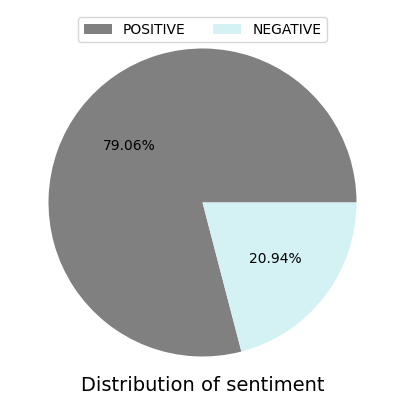

In [32]:
# Distribution of Sentiment
plt.figure(figsize = (5,5))

labels = ['POSITIVE','NEGATIVE']
colors = ['grey', '#D4F1F4']
plt.pie(df['Sentiment'].value_counts(), autopct='%0.2f%%', colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

# Handling Imbalance Data

In [33]:
# Splitting the Data

X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment_score'].values, test_size=0.20)

In [34]:
Counter(y_train)

Counter({1: 114014, 0: 30286})

In [35]:
# Implementing text vectorization with TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train, y_train)

<144300x996 sparse matrix of type '<class 'numpy.float64'>'
	with 231085 stored elements in Compressed Sparse Row format>

In [36]:
# Vectorization and transforming to an array

X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()

In [37]:
# Vectorization and transforming to an array

X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

In [38]:
# Creating an instance for RandomOverSampler

ROS = RandomOverSampler(sampling_strategy=1)

In [39]:
# fitting and resampling the data

X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [40]:
Counter(y_train_ros)

Counter({1: 114014, 0: 114014})

### Using the balanced dataset to build the model

##### Gaussian Naive Bayes

In [41]:
gnb = GaussianNB()

In [42]:
gnb.fit(X_train_ros, y_train_ros)

GaussianNB()

In [43]:
gnb_pred_ros = gnb.predict(X_test_tf)
print(gnb_pred_ros)

[1 1 0 ... 1 1 1]


In [44]:
gnb_acc = accuracy_score(y_test, gnb_pred_ros)

print("Scores for Gaussian Naive Bayes Model:", '\n')
print("Accuracy Score:", gnb_acc)
print("Precision Score:", precision_score(y_test, gnb_pred_ros))
print("Recall Score:", recall_score(y_test, gnb_pred_ros))

Scores for Gaussian Naive Bayes Model: 

Accuracy Score: 0.8697749196141479
Precision Score: 0.997957737673488
Recall Score: 0.8374077571433568


<AxesSubplot: >

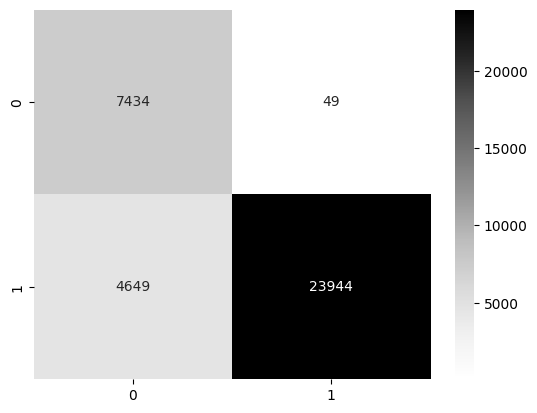

In [45]:
gnb_cm = confusion_matrix(y_test, gnb_pred_ros)

sns.heatmap(gnb_cm, annot=True, fmt="d", cmap='Greys')

In [46]:
print("Classification Report for Gaussian Naive Bayes Model:", '\n', classification_report(y_test, gnb_pred_ros))

Classification Report for Gaussian Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.62      0.99      0.76      7483
           1       1.00      0.84      0.91     28593

    accuracy                           0.87     36076
   macro avg       0.81      0.92      0.84     36076
weighted avg       0.92      0.87      0.88     36076



##### Bernoulli Naive Bayes

In [47]:
BNB = BernoulliNB()
BNB.fit(X_train_ros, y_train_ros)

BernoulliNB()

In [48]:
BNB_pred_ros = BNB.predict(X_test_tf)
print(BNB_pred_ros)

[1 1 0 ... 1 1 1]


In [49]:
bnb_acc = accuracy_score(y_test, BNB_pred_ros)

print("Scores for bernoulli Naive Bayes Model:", '\n')
print("Accuracy Score:", bnb_acc)
print("Precision Score:", precision_score(y_test, BNB_pred_ros))
print("Recall Score:", recall_score(y_test, BNB_pred_ros))

Scores for bernoulli Naive Bayes Model: 

Accuracy Score: 0.9217762501385963
Precision Score: 0.9705656794361465
Recall Score: 0.9294932326093799


<AxesSubplot: >

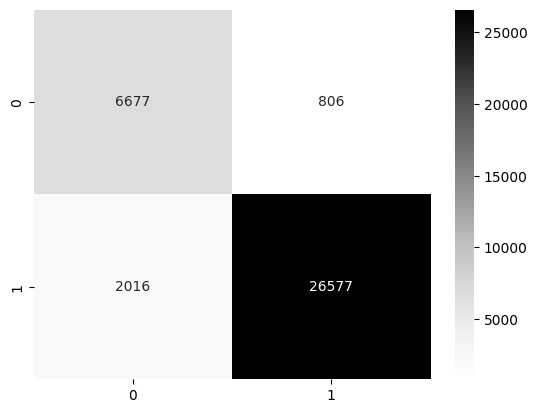

In [50]:
bnb_cm = confusion_matrix(y_test, BNB_pred_ros)

sns.heatmap(bnb_cm, annot=True, fmt="d", cmap='Greys')

In [51]:
print("Classification Report for Bernoulli Naive Bayes Model:", '\n',classification_report(y_test, BNB_pred_ros))

Classification Report for Bernoulli Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83      7483
           1       0.97      0.93      0.95     28593

    accuracy                           0.92     36076
   macro avg       0.87      0.91      0.89     36076
weighted avg       0.93      0.92      0.92     36076



##### Multionomial Naive Bayes

In [52]:
MNB = MultinomialNB()
MNB.fit(X_train_ros, y_train_ros)

MultinomialNB()

In [53]:
MNB_pred_ros = MNB.predict(X_test_tf)
print(MNB_pred_ros)

[1 1 0 ... 1 1 1]


In [54]:
mnb_acc = accuracy_score(y_test, MNB_pred_ros)

print("Scores  for Multinomial Naive Bayes Model:", '\n')
print("Accuracy Score:", mnb_acc)
print("Precision Score:", precision_score(y_test, MNB_pred_ros))
print("Recall Score:", recall_score(y_test, MNB_pred_ros))

Scores  for Multinomial Naive Bayes Model: 

Accuracy Score: 0.9225801086594966
Precision Score: 0.9982233894639271
Recall Score: 0.903927534711293


<AxesSubplot: >

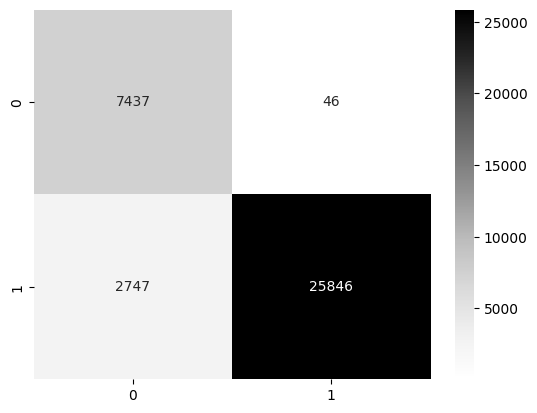

In [55]:
mnb_cm = confusion_matrix(y_test, MNB_pred_ros)

sns.heatmap(mnb_cm, annot=True, fmt="d", cmap='Greys')

In [56]:
print("Classification Report for Mutlinomial Naive Bayes Model:", '\n',classification_report(y_test, MNB_pred_ros))

Classification Report for Mutlinomial Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      7483
           1       1.00      0.90      0.95     28593

    accuracy                           0.92     36076
   macro avg       0.86      0.95      0.90     36076
weighted avg       0.94      0.92      0.93     36076



##### XGBClassifier

In [57]:
xgbc = XGBClassifier()
xgbc.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
xgbc_pred_ros = xgbc.predict(X_test_tf)
print(xgbc_pred_ros)

[1 1 1 ... 1 1 1]


In [59]:
xgbc_acc = accuracy_score(y_test, xgbc_pred_ros)

print("Scores for XGBClassifier Model:", '\n')
print("Accuracy Score for XGBClassifier:", xgbc_acc)
print("Precision Score:", precision_score(y_test, xgbc_pred_ros))
print("Recall Score:", recall_score(y_test, xgbc_pred_ros))

Scores for XGBClassifier Model: 

Accuracy Score for XGBClassifier: 0.9394611375984033
Precision Score: 0.9985652255993959
Recall Score: 0.9249466652677228


<AxesSubplot: >

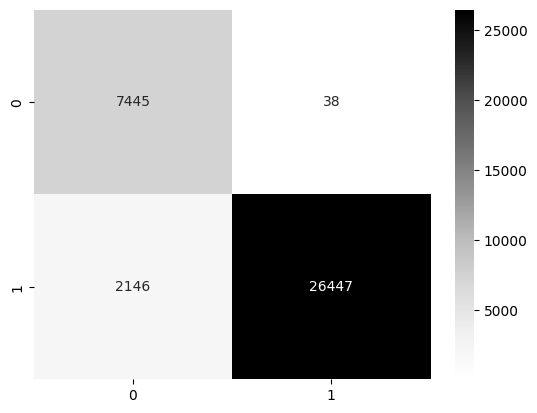

In [60]:
xgbc_cm = confusion_matrix(y_test, xgbc_pred_ros)

sns.heatmap(xgbc_cm, annot=True, fmt="d", cmap='Greys')

In [61]:
print("Classification Report for XGBClassifier: ", '\n', classification_report(y_test, xgbc_pred_ros))

Classification Report for XGBClassifier:  
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      7483
           1       1.00      0.92      0.96     28593

    accuracy                           0.94     36076
   macro avg       0.89      0.96      0.92     36076
weighted avg       0.95      0.94      0.94     36076



### Prediction Example

In [62]:
df['Review'].sample(2)

175252    mindblowing purchase
130983         perfect product
Name: Review, dtype: object

In [65]:
x = vectorizer.transform(['perfect'])
BNB.predict(x)

array([1], dtype=int64)

In [64]:
# 0 -> Negative
# 1 -> Positive